# Prep

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings; warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/gaming_info.csv', index_col=0)
df.head()

,company_name,brazilian_visitors,hq_country,bounce_rate,visit_duration,male,female,18-24,25-34,35-44,45-54,55-64,65+
0,rustreaper.com,-1,- -,0.247,4.0,0.638,0.362,0.253,0.302,0.184,0.123,0.087,0.051
1,rustreaper.com,-1,- -,0.247,4.0,0.638,0.362,0.253,0.302,0.184,0.123,0.087,0.051
2,thunderpick.com,-1,Belize,0.268,9.0,0.666,0.334,0.282,0.311,0.174,0.113,0.075,0.045
3,hellcase.com,105760,- -,0.233,5.0,0.772,0.228,0.320,0.292,0.169,0.103,0.072,0.043
4,givedrop.ru,-1,- -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.hq_country = df.hq_country.replace('- -', 'No info')
df = df.drop_duplicates()
df.shape

(54, 13)

In [6]:
df.visit_duration = pd.to_datetime(df.visit_duration, format='%M')
df = df.dropna()

In [8]:
df_brazil = df[df.brazilian_visitors != -1]
df_brazil.shape

(13, 13)

# Análise de empresas relevantes no Brasil (Brasil no top 5 acessos)

## Número de empresas

In [9]:
print(f'O Brasil está no top 5 acessos mensais de {df_brazil.shape[0]} empresas do segmento.')

O Brasil está no top 5 acessos mensais de 13 empresas do segmento.


## Acessos mensais

In [12]:
print(f'Números de visitantes mensais no Brasil: {df_brazil.brazilian_visitors.sum()/1_000_000:.2f}M')

Números de visitantes mensais no Brasil: 1.38M


## Países sede

In [25]:
countries = df_brazil.hq_country.value_counts()

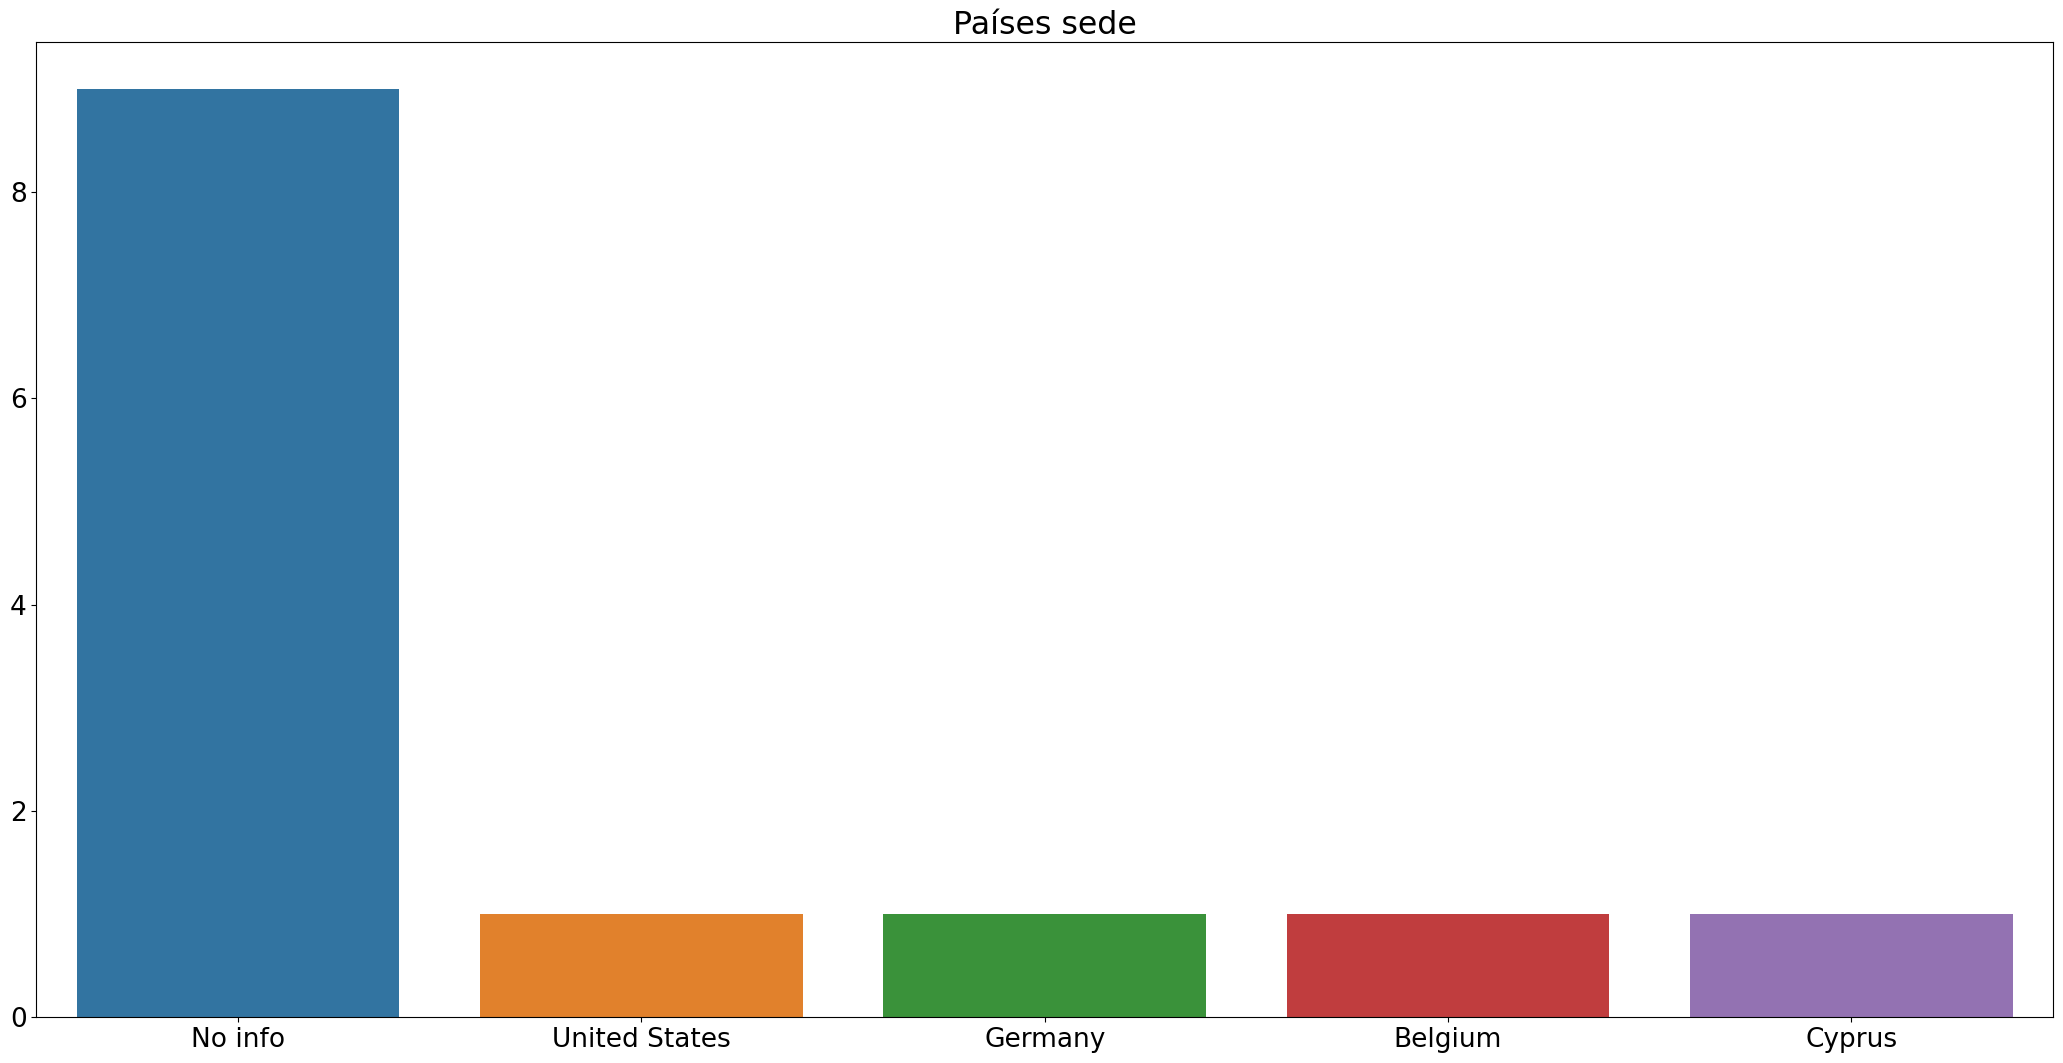

In [26]:
plt.figure(figsize=(21,11))
plt.rcParams.update({'font.size':19})
sns.barplot(x=countries.keys(), y=countries.values)
plt.title('Países sede')
plt.tight_layout();

## Qualidade da visita

In [17]:
bounce = df_brazil.bounce_rate.mean()*100
visit_dur = df_brazil.visit_duration.mean().time()

In [19]:
print(f'A taxa de bounce rate no segmento é em média {bounce:.2f}%')
print(f'O tempo médio de visita no segmento é de {visit_dur.minute}:{visit_dur.second}')

A taxa de bounce rate no segmento é em média 34.92%
O tempo médio de visita no segmento é de 4:41


## Demografia

### Sexo

In [20]:
male = round(df_brazil.male.mean(), 2)
female = 1 - male

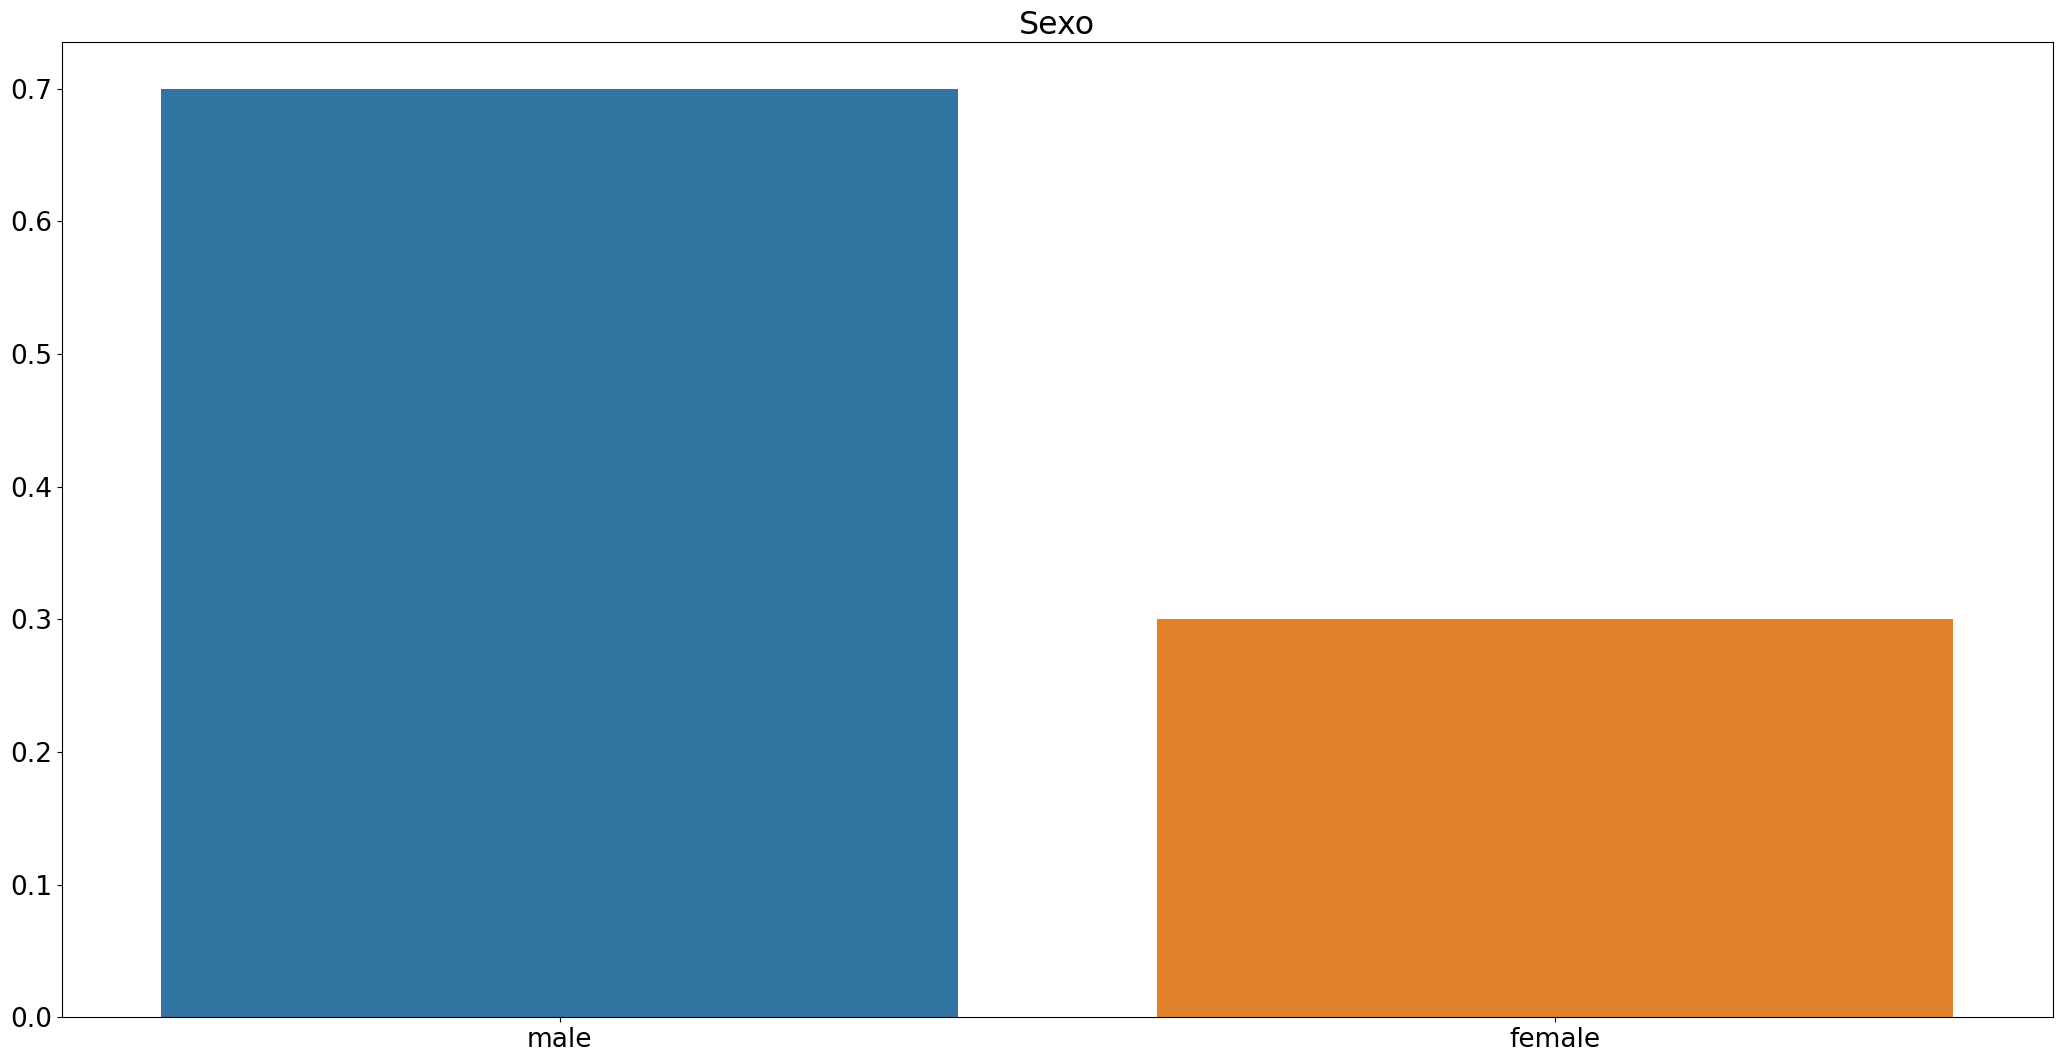

In [21]:
plt.figure(figsize=(21,11))
plt.rcParams.update({'font.size':19})
sns.barplot(x=['male','female'], y=[male, female])
plt.title('Sexo')
plt.tight_layout();

### Idade

In [23]:
age_buckets = df_brazil.columns[-6:]
idade = df_brazil[age_buckets]
media_idade = idade.mean()

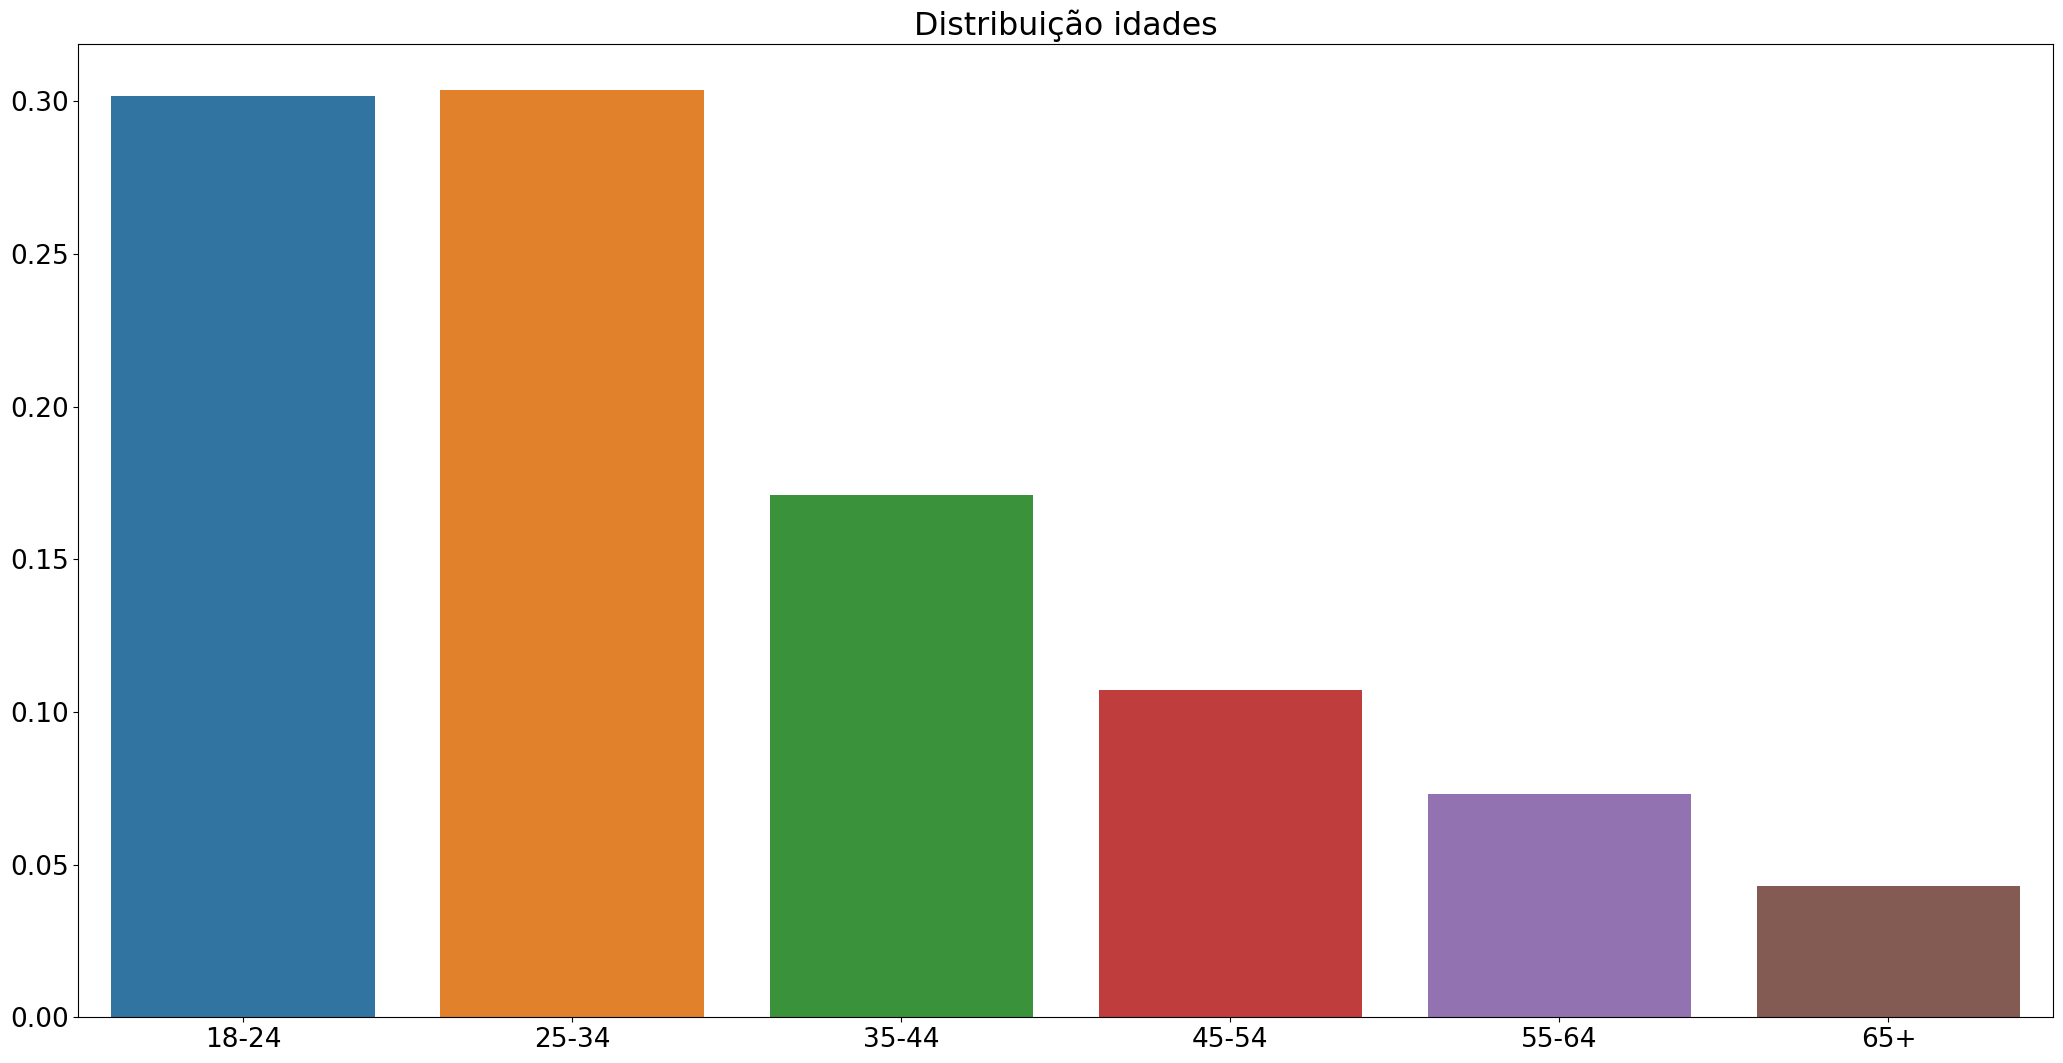

In [24]:
plt.figure(figsize=(21,11))
plt.rcParams.update({'font.size':19})
sns.barplot(x=media_idade.index, y=media_idade.values)
plt.title('Distribuição idades')
plt.tight_layout();